In [28]:
#Needed packages
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Load the Dataframe into the Jupiter Notebook
#This dataset is limited to 10,000 entries, since this is the maximum downloading capacity
#The whole dataset hat over 38.220.872 entries
#The dataset can be see here: https://console.cloud.google.com/bigquery?project=qualified-abode-170510&d=stackoverflow&p=bigquery-public-data&t=badges&page=table
#The used dataset here is a merge of the subset "posts_answers" and "posts_questions"
#This SQL-Code was used to retrieve the merges data from Google Clound Platform
#In the dataset are several questions without answers these are excluded by the query code (where  posts_questions.accepted_answer_id = posts_answers.id)

#SQL Code:

"""
SELECT *
 FROM bigquery-public-data.stackoverflow.posts_questions,bigquery-public-data.stackoverflow.posts_answers
 where  posts_questions.accepted_answer_id = posts_answers.id
LIMIT 10000
#The LIMIT=10000 since more cannot be downloaded at once 
"""


'\nSELECT *\n FROM bigquery-public-data.stackoverflow.posts_questions,bigquery-public-data.stackoverflow.posts_answers\n where  posts_questions.accepted_answer_id = posts_answers.id\nLIMIT 10000\n#The LIMIT=10000 since more cannot be downloaded at once \n'

In [15]:
#Load the merged data into Jupiter Notebook
df=pd.read_excel('daten_.xlsx')

In [16]:
#Visualize the data head
df.head(15)

#it is visible that the questions 
#have one acceped answer (there are several answers on one question, but only the acceped one is publsihed) 
#and a score (rating by users) 
#the question have taggs which are related to the software language used 
#questions have a parent id -->initial question (parten id) and sub questions
#the questions in the dataset are child and parent queestions; so the data is not disjunkt 
 

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,...,last_edit_date_1,last_editor_display_name_1,last_editor_user_id_1,owner_display_name_1,owner_user_id_1,parent_id_1,post_type_id_1,score_1,tags_1,view_count_1
0,37992108,My html form won't POST to mysql,<p>Hello i have a problem where my data isn't ...,37994134,1,16,NaN,2016-06-23 12:47:34.017 UTC,0.0,2016-06-23 14:11:39.8 UTC,...,NaN,NaN,NaN,NaN,6498280.0,37992108,2,0,NaN,NaN
1,38039505,Counting number of characters in a WCHAR string,<p>Lua has a function named <code>utf8.len()</...,38083489,1,25,NaN,2016-06-26 14:29:23.597 UTC,NaN,2016-06-28 18:15:46.893 UTC,...,NaN,NaN,NaN,NaN,3408572.0,38039505,2,1,NaN,NaN
2,30864424,How to get the appropriate ComboBox Tag,<p>I'm trying to get the Tag associated to a v...,30865517,2,10,NaN,2015-06-16 10:01:14.49 UTC,0.0,2015-06-18 19:15:43.763 UTC,...,2015-06-16 12:25:59.613 UTC,NaN,4984854.0,NaN,4984854.0,30864424,2,1,NaN,NaN
3,31033371,Angular loop is not updating,<p>Just started out with angular. I was succes...,31034475,2,13,NaN,2015-06-24 17:40:05.553 UTC,NaN,2015-06-24 20:04:45.793 UTC,...,NaN,NaN,NaN,NaN,2435473.0,31033371,2,1,NaN,NaN
4,30769186,"why vector is always slower than C array, at l...",<p>I am trying to find all the primes not grea...,30769515,1,36,NaN,2015-06-10 23:43:19.39 UTC,NaN,2015-06-11 00:50:01.66 UTC,...,2015-06-11 00:50:01.66 UTC,NaN,257645.0,NaN,257645.0,30769186,2,7,NaN,NaN
5,11926566,"jQuery Accordion Tab - Link to site, not page ...",<p>I've currently have 5 tabs on my jQuery Acc...,11927006,1,0,NaN,2012-08-12 23:09:29.383 UTC,NaN,2012-08-13 22:59:39.523 UTC,...,2012-08-13 22:59:39.523 UTC,NaN,1592971.0,NaN,1592971.0,11926566,2,1,NaN,NaN
6,25651501,Is there java.io.Reader equivalent in Go?,<p>Go has very nice <code>io.Reader</code> and...,25652169,1,7,NaN,2014-09-03 18:44:49.767 UTC,NaN,2015-07-23 10:02:59.063 UTC,...,NaN,NaN,NaN,NaN,145587.0,25651501,2,3,NaN,NaN
7,25452101,NullPointerException while trying to bind at S...,"<p>I have asked <a href=""https://stackoverflow...",25473115,3,7,NaN,2014-08-22 16:58:47.14 UTC,NaN,2014-08-24 15:11:28.927 UTC,...,NaN,NaN,NaN,NaN,2175647.0,25452101,2,0,NaN,NaN
8,25554344,Calculate input of textbox and update another ...,"<p>my UI - <a href=""http://puu.sh/bbx5G/33953b...",25554940,3,7,NaN,2014-08-28 17:08:57.26 UTC,NaN,2014-08-28 19:08:59.697 UTC,...,2014-08-28 18:04:28.743 UTC,NaN,3799191.0,NaN,3799191.0,25554344,2,1,NaN,NaN
9,25409238,Select File Name created with Date and Time fo...,<pre><code> NSString *dateString= [self curren...,25410236,1,8,NaN,2014-08-20 15:54:00.95 UTC,0.0,2014-08-20 16:48:06.023 UTC,...,NaN,NaN,NaN,NaN,2891273.0,25409238,2,0,NaN,NaN


In [17]:
#Visualize the data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10000 non-null  int64  
 1   title                       10000 non-null  object 
 2   body                        10000 non-null  object 
 3   accepted_answer_id          10000 non-null  int64  
 4   answer_count                10000 non-null  int64  
 5   comment_count               10000 non-null  int64  
 6   community_owned_date        4 non-null      object 
 7   creation_date               10000 non-null  object 
 8   favorite_count              2669 non-null   float64
 9   last_activity_date          10000 non-null  object 
 10  last_edit_date              5612 non-null   object 
 11  last_editor_display_name    144 non-null    object 
 12  last_editor_user_id         5524 non-null   float64
 13  owner_display_name          267 

In [18]:
#Visualization of the number of question regarding a software language 
#first a subset of data is created
tags_df = data['tags']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 3 to 17
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Produkttyp           15 non-null     object
 1   Numbers_of_Question  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 360.0+ bytes


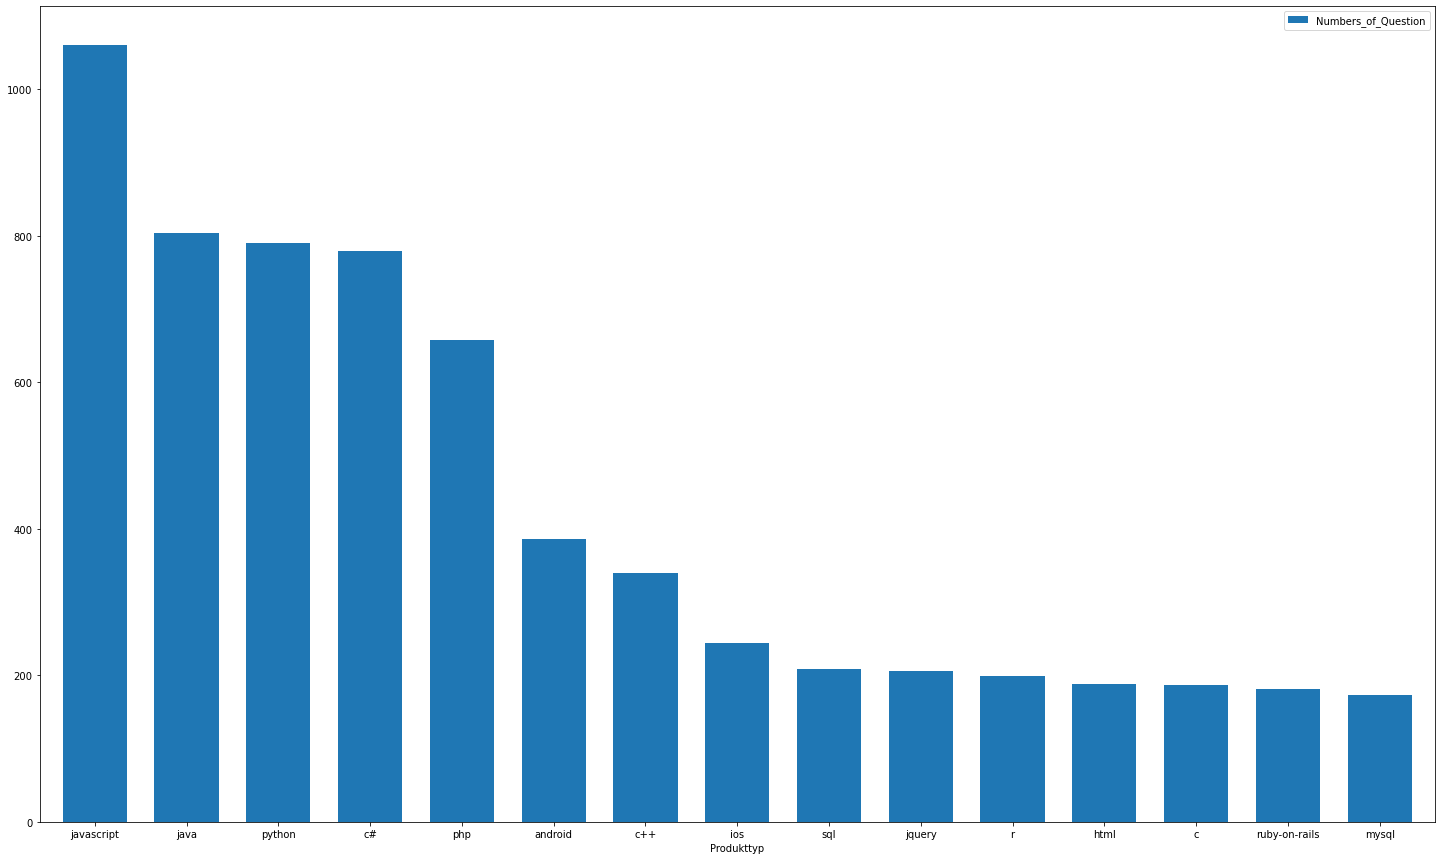

In [36]:
#list of taggs is created 
tags_liste= tags_df.tolist()

#ongoing list of all tags is created 
#remove hashtag to see the print
#print(tags_liste)

#in order to count the occurence we need to split the set
split_set=[]

#for loop to split the tags 
for i in tags_liste: 
     split_set.append(i.split('|')[0])
                
#remove hashtag to see the print           
#print(split_set)        

#from the collections package the counter is executed to count the elements in the list
#the list is split and sorted by the number of occurence
counted_results=Counter(split_set)
 
#remove hashtag to see the print 
#print(counted_results)


#dataframe is created by the counted results 
dataframe=pd.DataFrame.from_dict(counted_results, orient='index')


#name the columns and index 
dataframe1=dataframe.reset_index()
dataframe2=dataframe1.rename(columns={"index":"Produktyp"})
dataframe2.columns=["Produkttyp", 'Numbers_of_Question']
dataframe2.head()

#sort the values by occurence 
dataframe3= dataframe2.sort_values(by='Numbers_of_Question',ascending=False)
dataframe3.head()

#remove all tags which have a smaller occurence of 100 to improve the visualization
dataframe4=dataframe3[dataframe3['Numbers_of_Question']>100]

#show the info and head of the data 
dataframe4.info()
dataframe4.head()

#crate a barchart to visualize the data
df = dataframe4
ax = df.plot.bar(x='Produkttyp', y='Numbers_of_Question', rot=0, width=0.7,figsize=(25,15))
plt.rcParams.update({'font.size': 10})

#export the graph 
plt.savefig('bar_chart.png')


#it is visible that the most frequent tags are "javascript" 
#in oder to fit the data to our case we have decided to use questions which occurence is over 240
#all other tags are considered as being others 
#in praxis several inbound mails are regarding different product categories
#but a large majority are considerd as not other question; not product related 
#in order to fit the praxis context of our case to the data. We have created a label called "others"

In [35]:
#export the graph 
plt.savefig('foo.pdf')

<Figure size 432x288 with 0 Axes>